In [5]:
import jax
from sklearn.datasets import make_blobs
import seaborn as sns

from kmeans import KMeans
from utils import plot_clusters

sns.set_theme()

In [6]:
# hyperparameters
n_clusters = 2
n_features = 2
random_seed = 42
n_samples = 100

true_center_coords = [
    (1, 1),
    (2, 2)
]

cluster_std = [0.5, 0.3]

In [7]:
data, labels = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=true_center_coords,
    cluster_std=cluster_std,
    random_state=random_seed
)

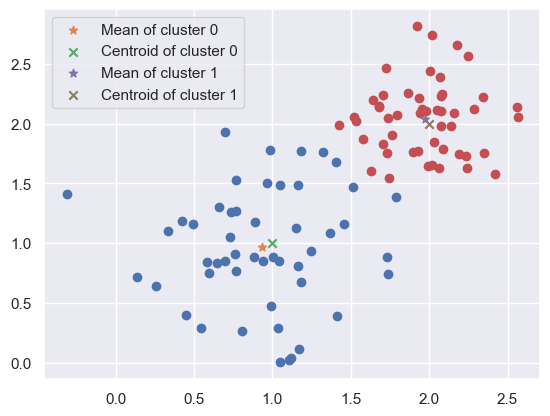

In [8]:
plot_clusters(data, labels, centroid_coords=jax.numpy.asarray(true_center_coords))

In [11]:
kmeans = KMeans(n_clusters)
kmeans.initialize(data)
kmeans.cluster_centroids

Array([[0.26069272, 2.2442622 ],
       [0.03955339, 1.8066475 ]], dtype=float32)

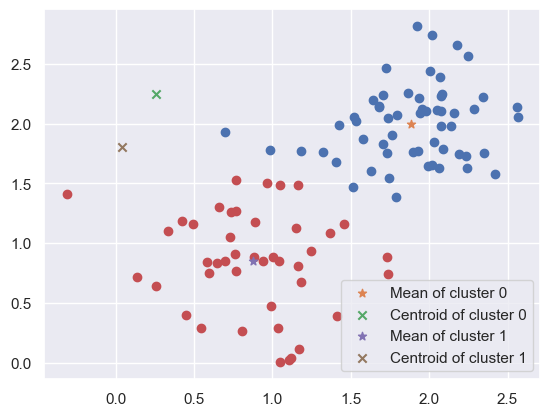

In [12]:
plot_clusters(data, kmeans.predict(data), centroid_coords=kmeans.cluster_centroids)

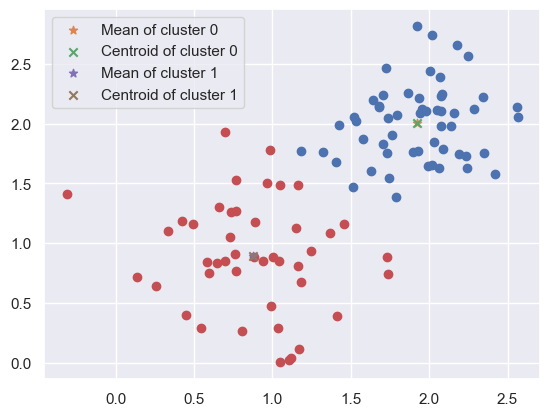

In [15]:
kmeans.update(data)
plot_clusters(data, kmeans.predict(data), centroid_coords=kmeans.cluster_centroids)